 # KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_clipboard()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
type(df)

pandas.core.frame.DataFrame

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

In [14]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

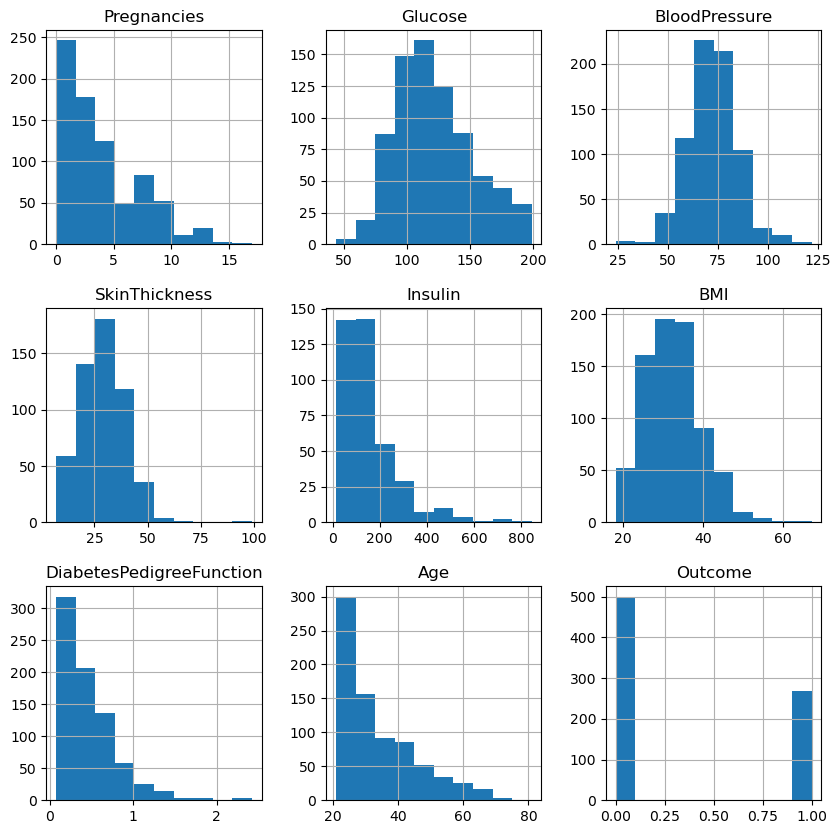

In [15]:
df.hist(figsize=(10,10))

C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

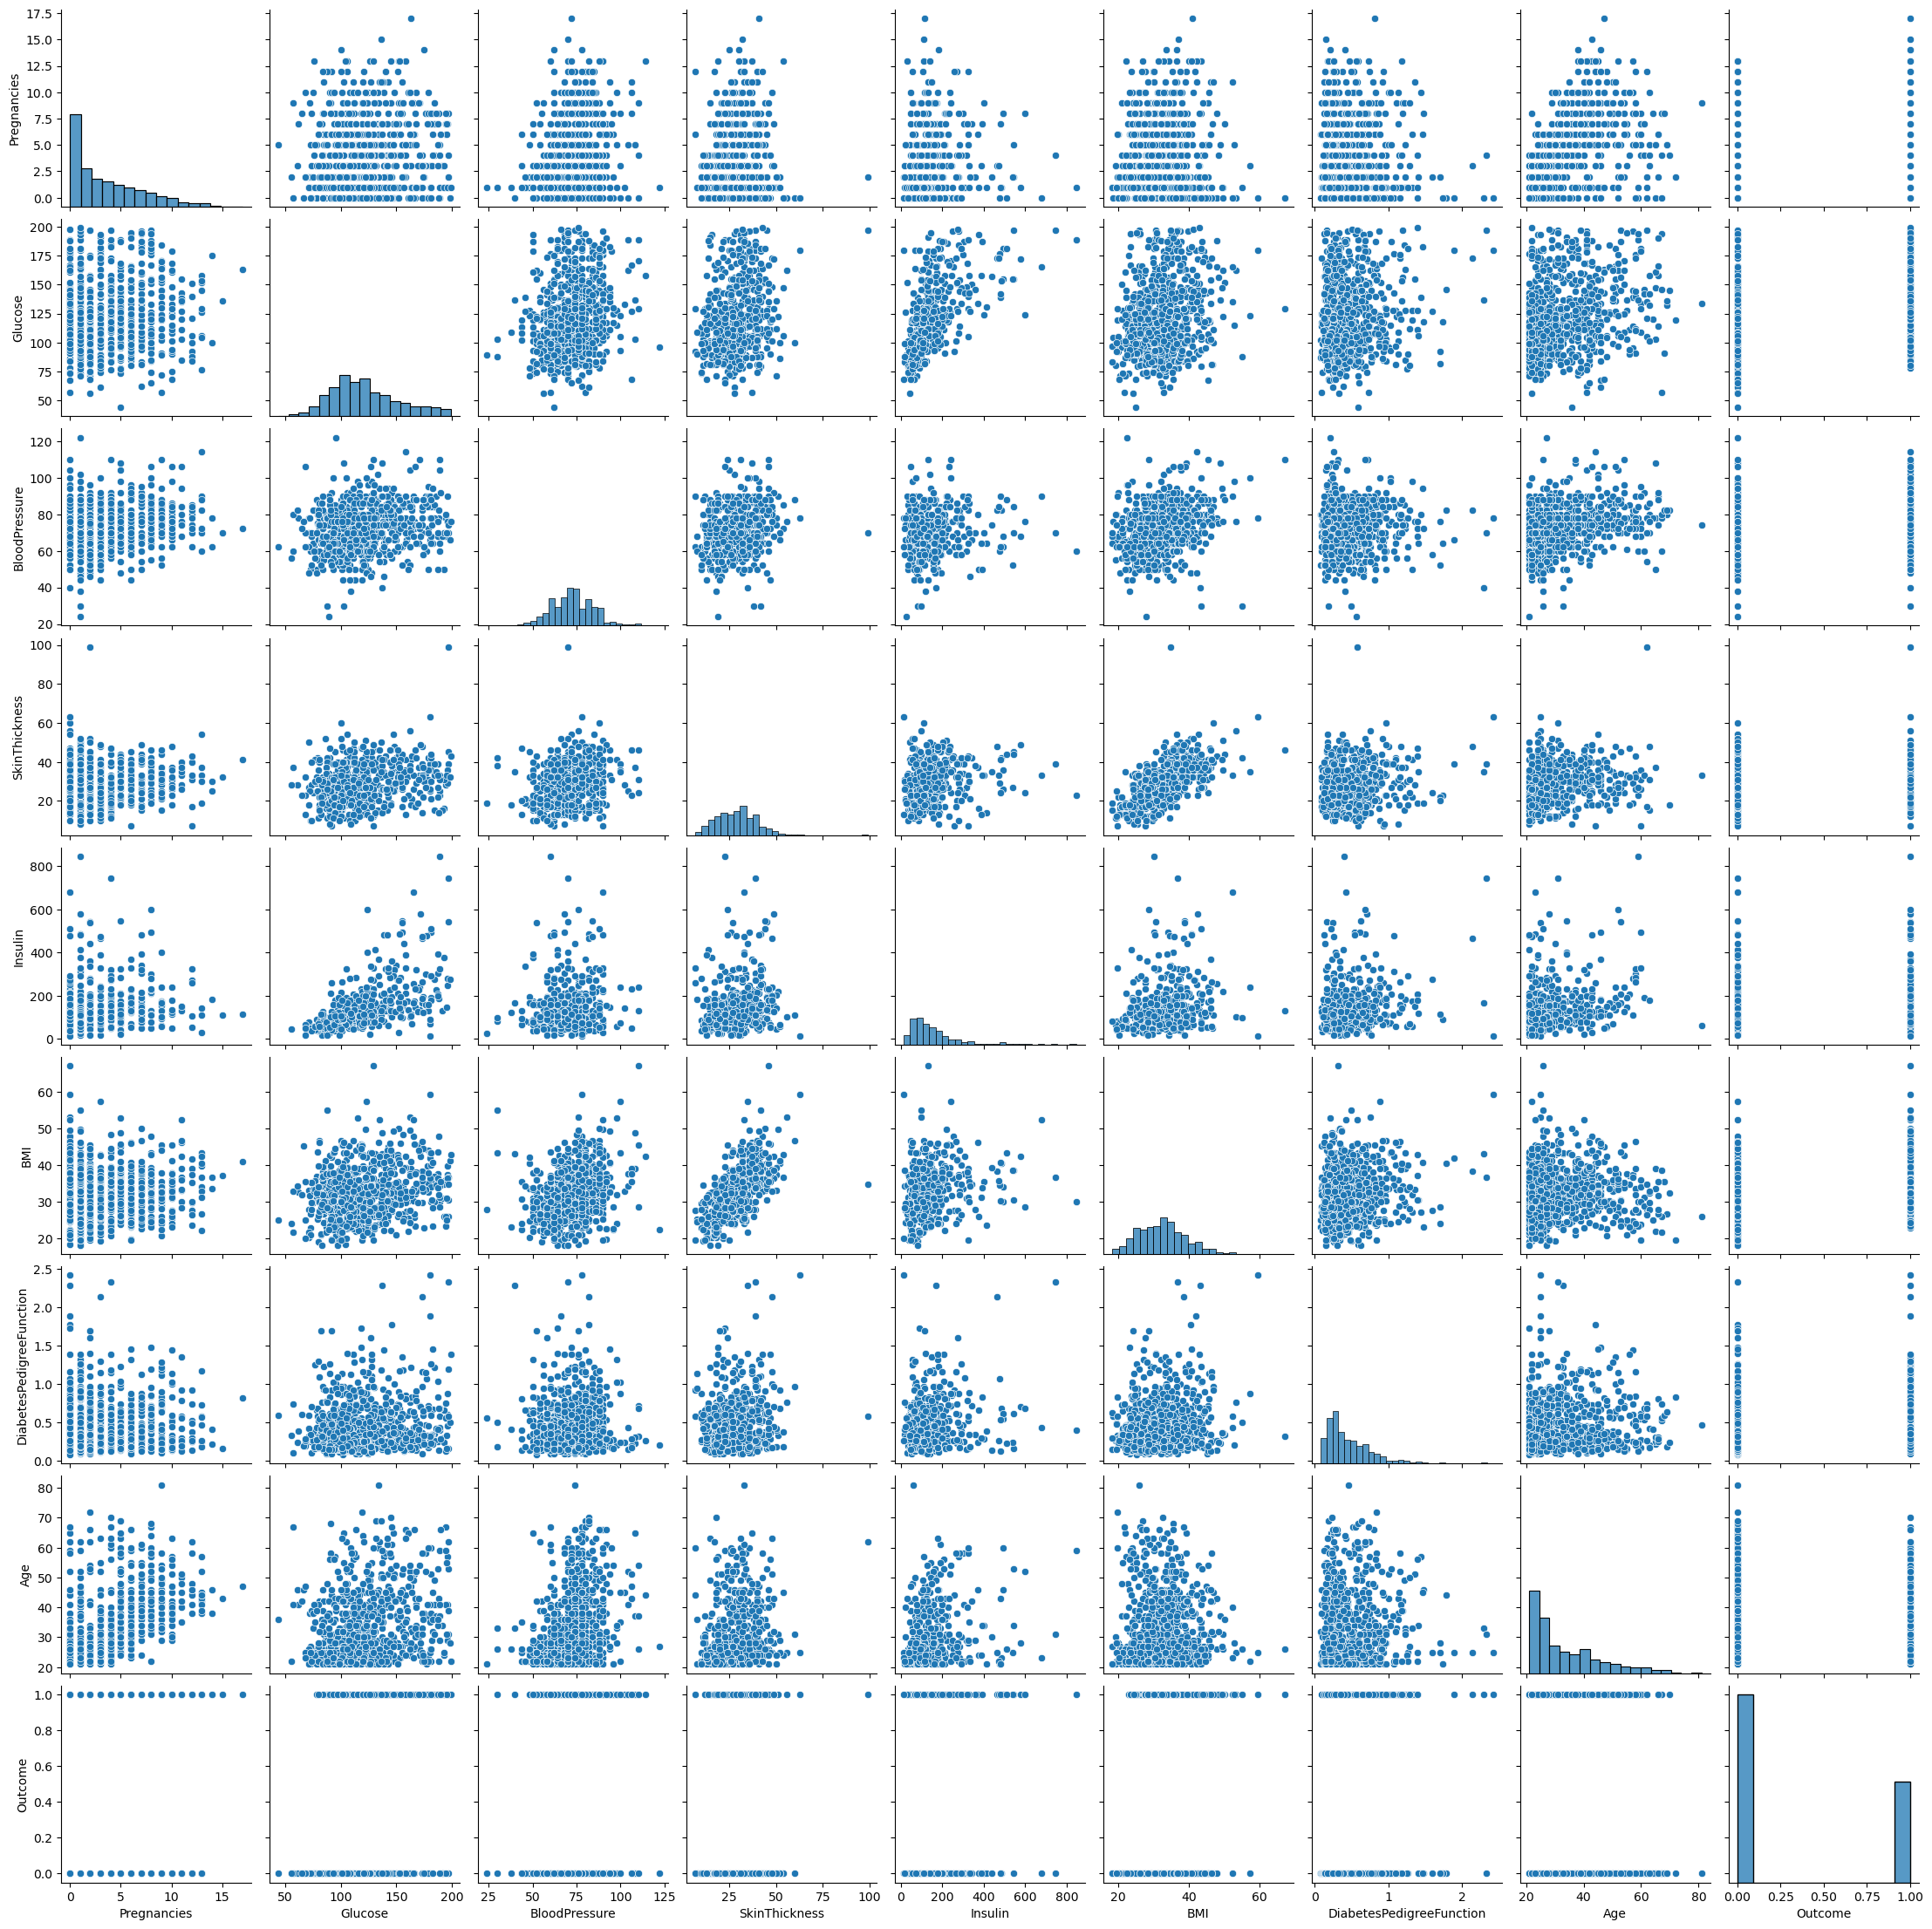

In [16]:
sns.pairplot(df)

<Axes: >

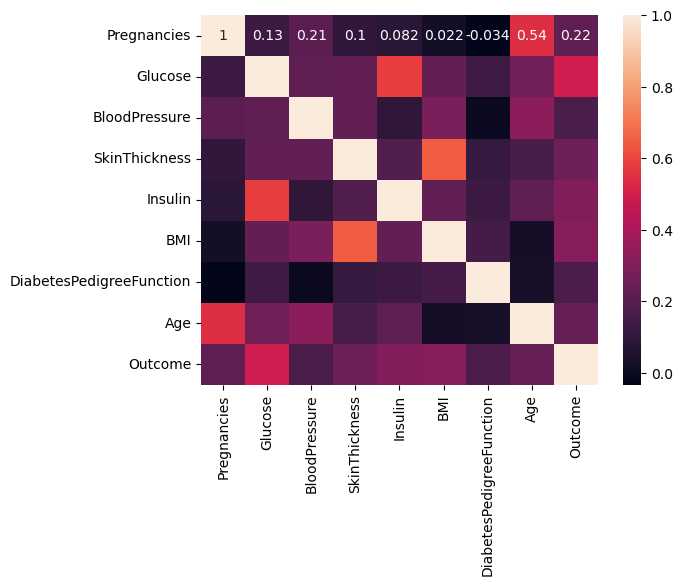

In [17]:
sns.heatmap(df.corr(),annot=True)

 # section 3. data split & apply data imputation and feature scalling

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', ]]

In [22]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47


In [23]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [26]:
xtrain.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                24
SkinThickness               176
Insulin                     290
BMI                           7
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [27]:
xtest.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure               11
SkinThickness               51
Insulin                     84
BMI                          4
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

In [28]:
ytrain.isnull().sum()

0

In [29]:
ytest.isnull().sum()

0

 # Data Imputation

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5232\2482852176.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain[columns_with_nan[i]],ax=ax[i])
C:\Users\ELCOT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5232\2482852176.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function wi

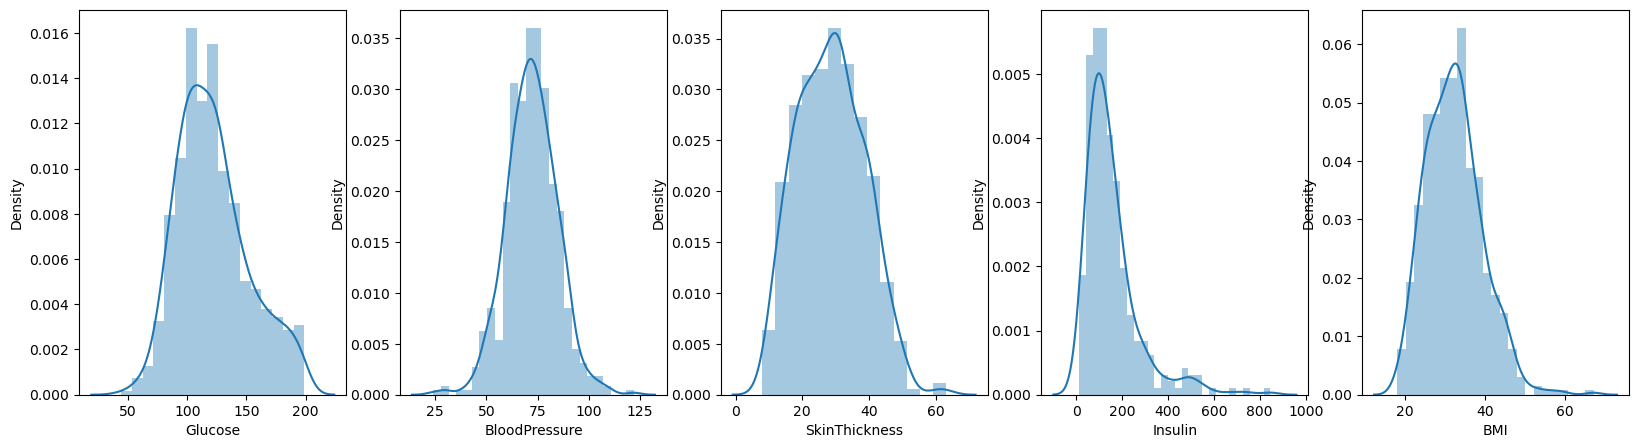

In [32]:
columns_with_nan=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,5))
for i in range(len(columns_with_nan)):
    sns.distplot(xtrain[columns_with_nan[i]],ax=ax[i])

In [33]:
Glucose_mean_xtrain=xtrain.loc[:,"Glucose"].mean()
BloodPressure_mean_xtrain=xtrain.loc[:,"BloodPressure"].mean()

In [34]:
Skinthickness_median_xtrain=xtrain.loc[:,"SkinThickness"].median()
insulin_median_xtrain=xtrain.loc[:,"Insulin"].median()
bmi_median_xtrain=xtrain.loc[:,"BMI"].median()

In [35]:
xtrain.loc[:,"Glucose"]=xtrain.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
xtrain.loc[:,"BloodPressure"]=xtrain.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
xtrain.loc[:,"SkinThickness"]=xtrain.loc[:,"SkinThickness"].fillna(Skinthickness_median_xtrain)
xtrain.loc[:,"Insulin"]=xtrain.loc[:,"Insulin"].fillna(insulin_median_xtrain)
xtrain.loc[:,"BMI"]=xtrain.loc[:,"BMI"].fillna(bmi_median_xtrain)

In [36]:
xtrain.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [37]:
xtest.loc[:,"Glucose"]=xtest.loc[:,"Glucose"].fillna(Glucose_mean_xtrain)
xtest.loc[:,"BloodPressure"]=xtest.loc[:,"BloodPressure"].fillna(BloodPressure_mean_xtrain)
xtest.loc[:,"SkinThickness"]=xtest.loc[:,"SkinThickness"].fillna(Skinthickness_median_xtrain)
xtest.loc[:,"Insulin"]=xtest.loc[:,"Insulin"].fillna(insulin_median_xtrain)
xtest.loc[:,"BMI"]=xtest.loc[:,"BMI"].fillna(bmi_median_xtrain)

In [38]:
xtest.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [39]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.238983,28.5,120.0,32.0,0.304,21
618,9,112.0,82.000000,24.0,120.0,28.2,1.282,50
346,1,139.0,46.000000,19.0,83.0,28.7,0.654,22
294,0,161.0,50.000000,28.5,120.0,21.9,0.254,65
231,6,134.0,80.000000,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.0,140.0,28.6,0.411,26
106,1,96.0,122.000000,28.5,120.0,22.4,0.207,27
270,10,101.0,86.000000,37.0,120.0,45.6,1.136,38
435,0,141.0,72.238983,28.5,120.0,42.4,0.205,29


 # normalization or mini-max scalling

In [41]:
from sklearn.preprocessing import MinMaxScaler
mini_max_scale=MinMaxScaler()

In [42]:
x_train=mini_max_scale.fit_transform(xtrain)
x_train

array([[0.11764706, 0.25806452, 0.49223452, ..., 0.28220859, 0.09649872,
        0.        ],
       [0.52941176, 0.43870968, 0.59183673, ..., 0.20449898, 0.51409052,
        0.48333333],
       [0.05882353, 0.61290323, 0.2244898 , ..., 0.21472393, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.36774194, 0.63265306, ..., 0.5603272 , 0.45175064,
        0.28333333],
       [0.        , 0.62580645, 0.49223452, ..., 0.49488753, 0.05422716,
        0.13333333],
       [0.        , 0.52258065, 0.73469388, ..., 0.08793456, 0.07856533,
        0.        ]])

In [44]:
x_test=mini_max_scale.transform(xtest)
x_test

array([[0.35294118, 0.3483871 , 0.34693878, ..., 0.32310838, 0.15029889,
        0.36666667],
       [0.11764706, 0.43870968, 0.52040816, ..., 0.35787321, 0.02988898,
        0.        ],
       [0.11764706, 0.41290323, 0.40816327, ..., 0.25766871, 0.03415884,
        0.        ],
       ...,
       [0.47058824, 0.32903226, 0.48979592, ..., 0.3803681 , 0.17378309,
        0.6       ],
       [0.11764706, 0.65806452, 0.46938776, ..., 0.200409  , 0.11058924,
        0.13333333],
       [0.47058824, 0.19354839, 0.46938776, ..., 0.34969325, 0.2677199 ,
        0.3       ]])

 # secton 4: model billing

In [45]:
from sklearn.neighbors import KNeighborsClassifier


In [46]:
knn_model= KNeighborsClassifier(10)

In [47]:
knn_model.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_pred=knn_model.predict(xtest)

In [51]:
from sklearn.metrics import accuracy_score,classification_report

In [52]:
accuracy_score(ytest,y_pred)

0.7337662337662337

In [53]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        99
           1       0.64      0.58      0.61        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



 # predict on unknown person features

In [55]:
knn_model.predict(np.array([[9,112.0,82.000000,24.0,120.0,28.2,1.282,50]]))

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)